In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from os import path
from wordcloud import WordCloud
import seaborn as sns

df = pd.read_json("result.json")

In [3]:
chat_df = pd.DataFrame(df['messages'].copy())
chat = pd.DataFrame(chat_df.messages.values.tolist())

In [4]:
display(chat)

,id,type,date,actor,actor_id,action,title,members,text,inviter,...,mime_type,duration_seconds,width,height,sticker_emoji,photo,edited,forwarded_from,via_bot,message_id
0,-999963790,service,2020-03-28T12:15:32,Claudio J Paz,user200010665,create_group,Virtual install fest,"[Claudio J Paz, Martin Nievas]",,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-999963789,service,2020-03-28T12:16:50,None,user1140775232,join_group_by_link,NaN,NaN,,Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-999963788,service,2020-03-28T12:17:03,None,user1059683248,join_group_by_link,NaN,NaN,,Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-999963787,service,2020-03-28T12:17:55,Claudio J Paz,user200010665,migrate_to_supergroup,NaN,NaN,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,service,2020-03-28T12:17:55,Virtual install fest,channel1338119199,migrate_from_group,Virtual install fest,NaN,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64010,64451,message,2022-05-05T14:37:19,NaN,NaN,NaN,NaN,NaN,Y acá en formato video jaja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64011,64452,message,2022-05-05T14:40:35,NaN,NaN,NaN,NaN,NaN,también habría que hacer una lista para ver qu...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64012,64453,message,2022-05-05T14:55:18,NaN,NaN,NaN,NaN,NaN,Hay que hacer uno nuevo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64013,64454,message,2022-05-05T15:00:23,NaN,NaN,NaN,NaN,NaN,Yo tengo el pendrive en el llavero por si algu...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Message Ranking

In [5]:
chat.columns

Index(['id', 'type', 'date', 'actor', 'actor_id', 'action', 'title', 'members',
       'text', 'inviter', 'from', 'from_id', 'reply_to_message_id', 'file',
       'thumbnail', 'media_type', 'mime_type', 'duration_seconds', 'width',
       'height', 'sticker_emoji', 'photo', 'edited', 'forwarded_from',
       'via_bot', 'message_id'],
      dtype='object')

In [6]:
names = []
messages = []
date = []
for i in range(0,chat.shape[0]):
    try:
        messages.append(chat['text'][i])
        names.append(chat['from'][i])
        date.append(chat['date'][i])
    except:
        pass

In [7]:
print(len(names))
print(len(messages))

64015
64015


In [35]:
removal_list = ['nan']
name_list = [word for word in names if str(word) not in removal_list]

counts = Counter(name_list)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

labels_100 = labels[0:20]
values_100 = values[0:20]
indexes_100 = indexes[0:20]

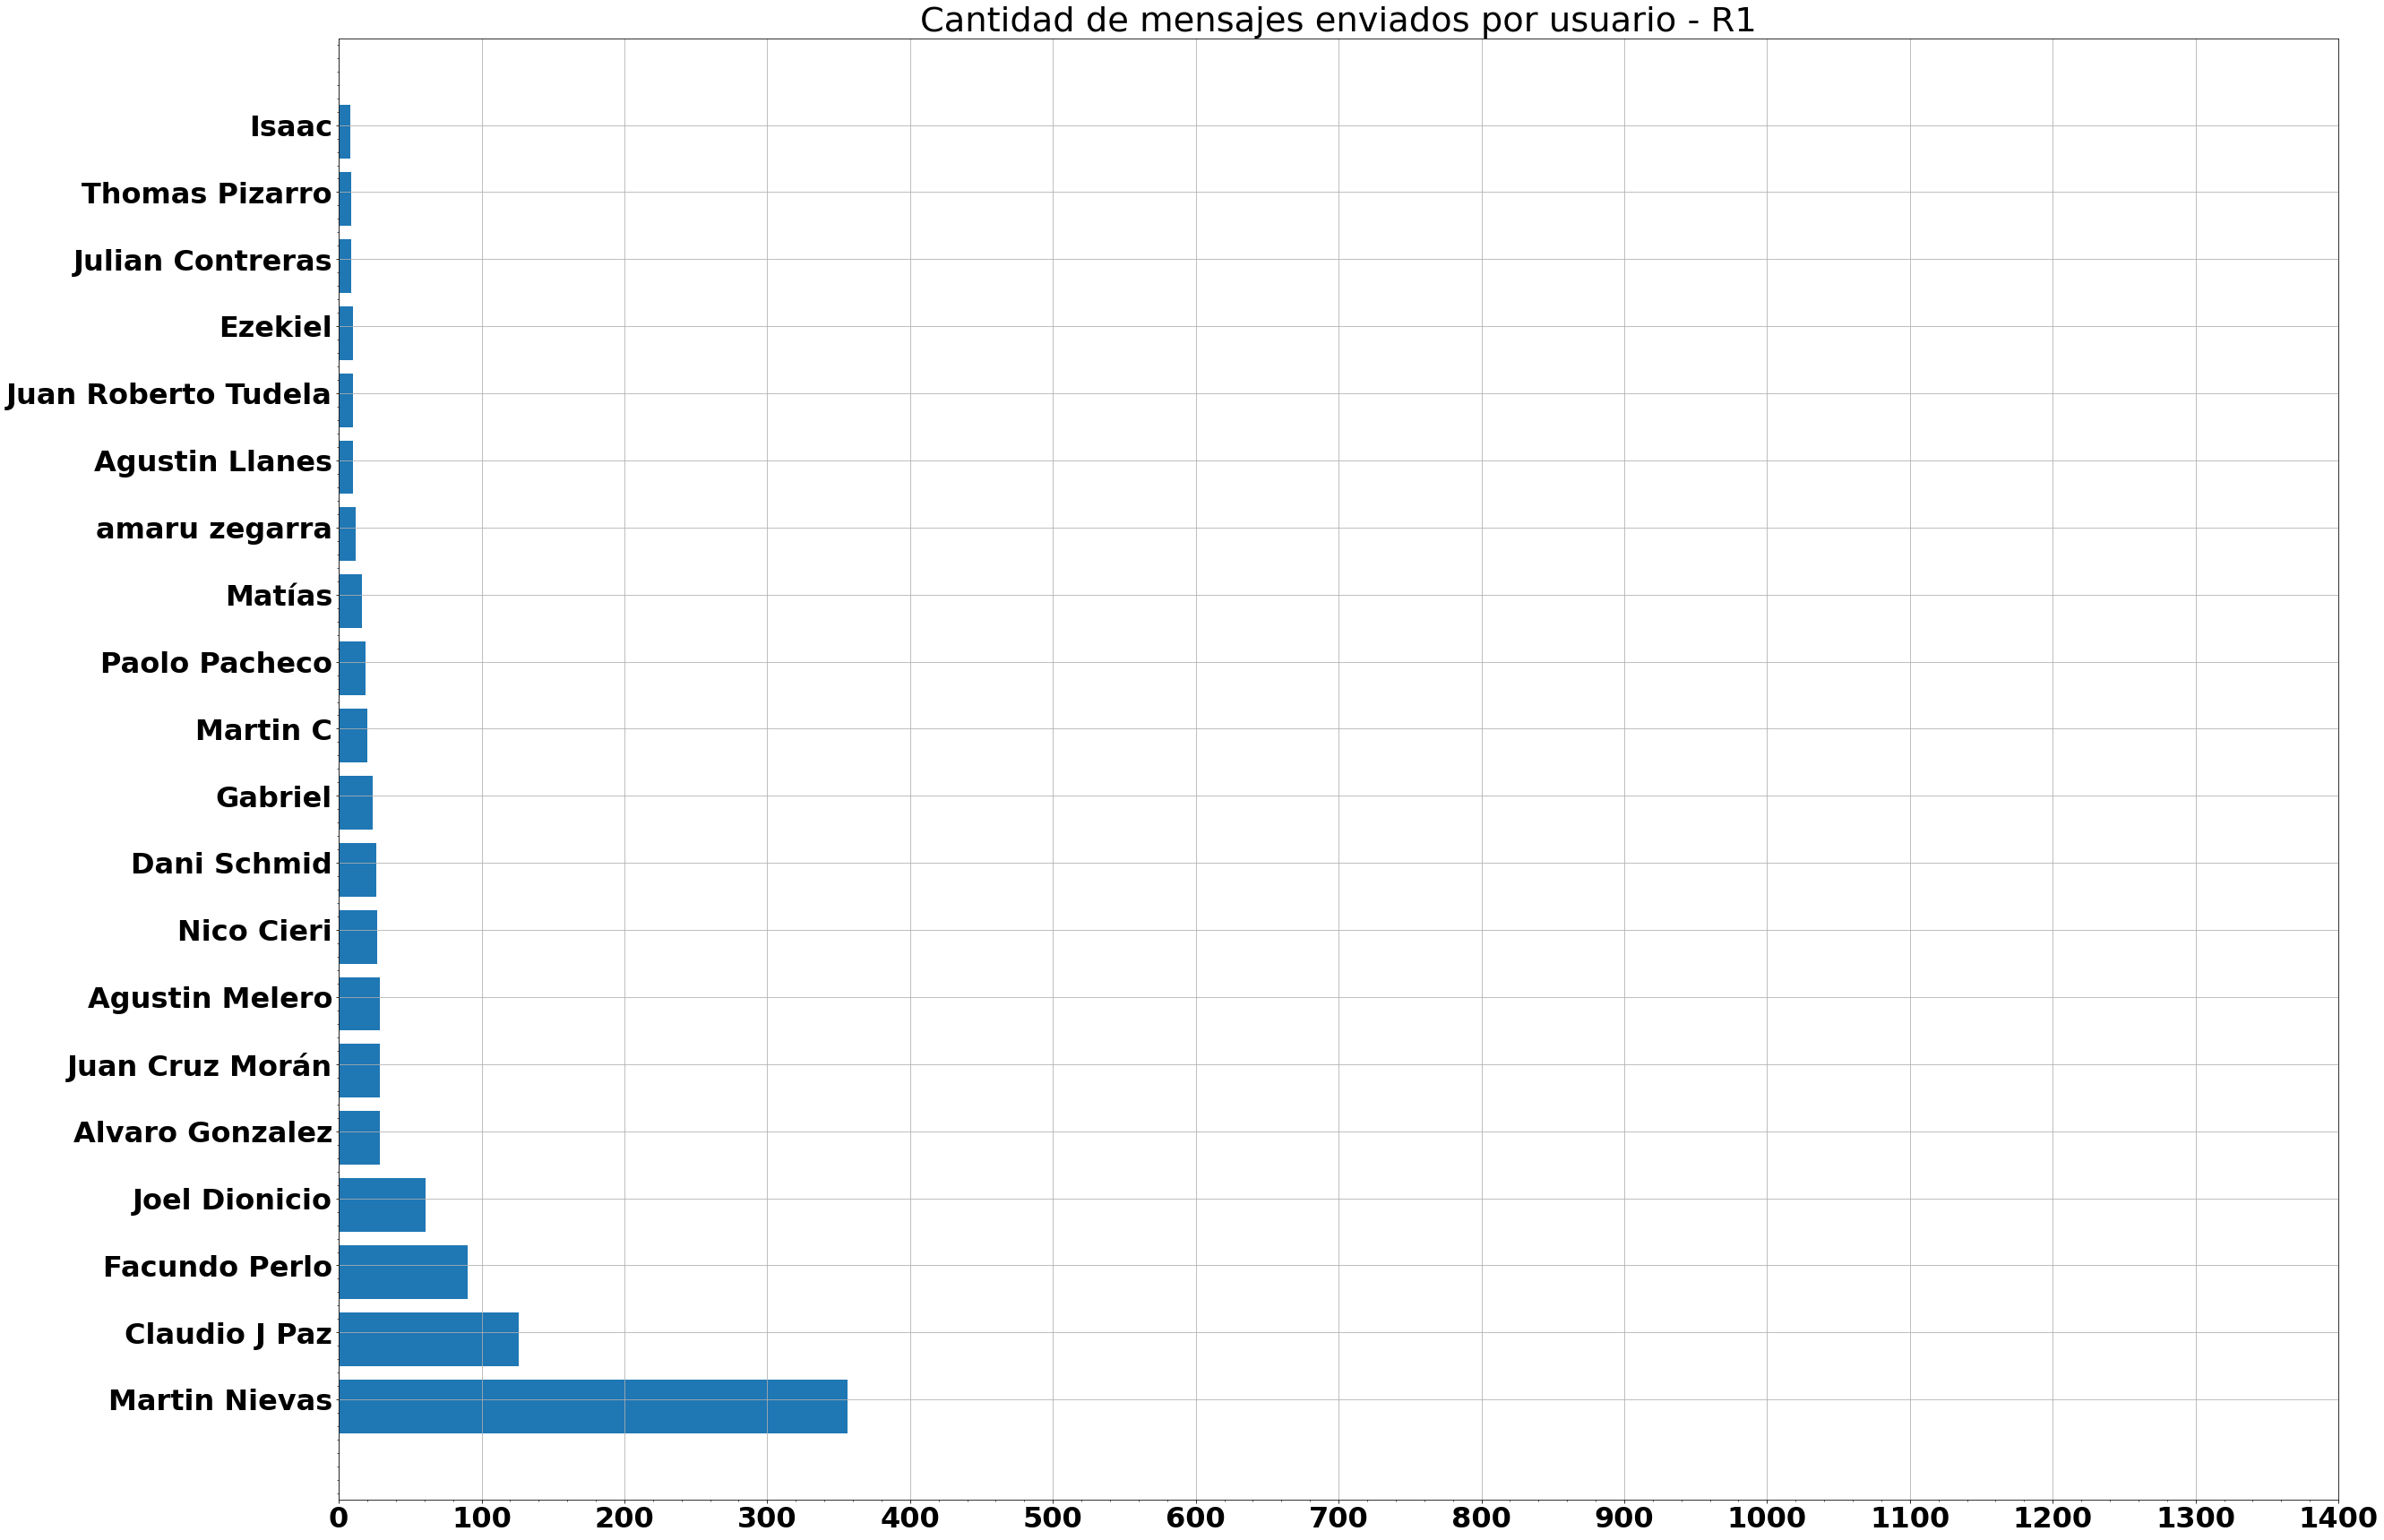

In [36]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}
plt.rc('font', **font)
fig = plt.figure(figsize=(40,30))
bar_width = 0.1

plt.barh(indexes_100, values_100)

# add labels
plt.yticks(indexes_100 + bar_width, labels_100)
#plt.savefig('books_read.pdf')

plt.grid(True)
#plt.xscale('log')
plt.minorticks_on()
plt.xticks(np.arange(0, 1500, 100.0))

#plt.xlabel('Performance')
plt.title('Cantidad de mensajes enviados por usuario - R1')

#plt.xticks(np.arange(min(values), 100, 10.0))
plt.savefig('mensajes.png')
plt.show()


# Most frequent words

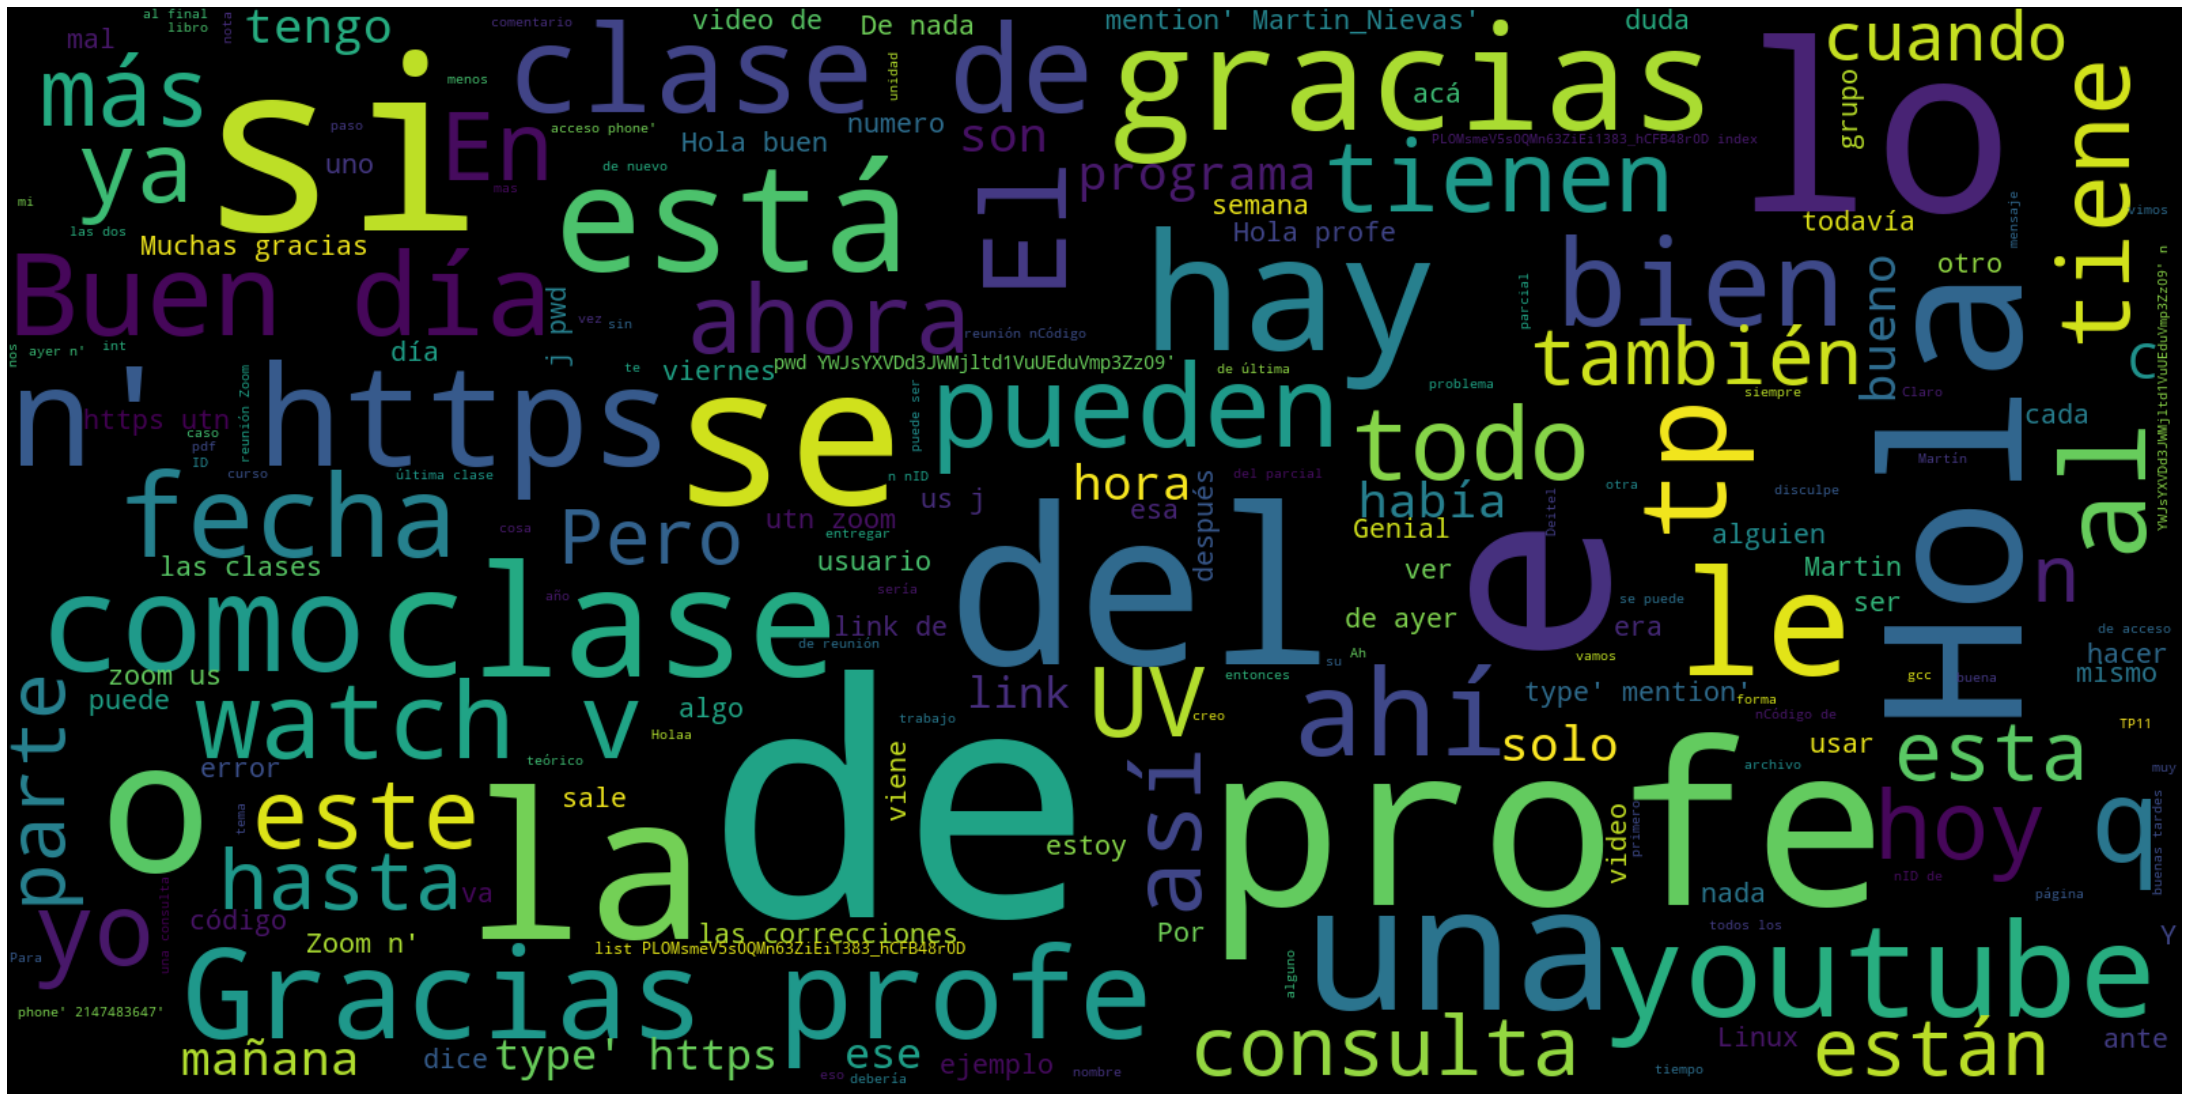

In [37]:

file = open('data.txt', 'w')
for msj in messages:
    file.write(str(msj)+" ")
file.close()

removal_list = ["jaja", "jaja", "type", "linkl", "pero", "con",\
                "y", "eso", "porque", "'link',", "{'type':","'text':","https"\
               "lo", "que", "un", "en", "para", "por", "la", "lo", "el"]


# Read the whole text.
text = open('data.txt').read()
text_split = text.split()

final_list = [word for word in text_split if word not in removal_list]

final_string = ' '.join(final_list)


# lower max_font_size
wordcloud = WordCloud(max_font_size=120,width=800,height=400,scale=2).generate(final_string)
plt.figure(figsize=(40,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('words_install.png')
plt.show()